In [50]:
#Import files and packages needed
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [51]:
#Read the CSV file in order to view first 5 rows
data = pd.read_csv("spotify-streaming-top-50-south-korea.csv")
data.head()

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Like Crazy,Jimin,93,212241,single,6,2023-03-24,False,https://i.scdn.co/image/ab67616d0000b2732b4607...
1,2023-05-18,2,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM,87,182148,album,13,2023-05-01,False,https://i.scdn.co/image/ab67616d0000b273d71fd7...
2,2023-05-18,3,Spicy,aespa,81,197040,single,6,2023-05-08,False,https://i.scdn.co/image/ab67616d0000b27304878a...
3,2023-05-18,4,I AM,IVE,89,183853,album,11,2023-04-10,False,https://i.scdn.co/image/ab67616d0000b27325ef3c...
4,2023-05-18,5,Queencard,(G)I-DLE,71,161240,single,6,2023-05-15,False,https://i.scdn.co/image/ab67616d0000b27382dd24...


In [52]:
#Only keep the columns we need
data = data[["date", "position", "song", "artist", "popularity", "album_type", "release_date"]]
data.head()

,date,position,song,artist,popularity,album_type,release_date
0,2023-05-18,1,Like Crazy,Jimin,93,single,2023-03-24
1,2023-05-18,2,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM,87,album,2023-05-01
2,2023-05-18,3,Spicy,aespa,81,single,2023-05-08
3,2023-05-18,4,I AM,IVE,89,album,2023-04-10
4,2023-05-18,5,Queencard,(G)I-DLE,71,single,2023-05-15


In [53]:
#Converting the column names from text into actual data we can manipulate later
data["date"] = pd.to_datetime(data["date"])
data["release_date"] = pd.to_datetime(data["release_date"], errors='coerce')

In [54]:
#Insert a new column determing the days since releaase and when it was in top 50
data["age_of_song"] = (data["date"] - data["release_date"]).dt.days
data.head()

,date,position,song,artist,popularity,album_type,release_date,age_of_song
0,2023-05-18,1,Like Crazy,Jimin,93,single,2023-03-24,55.0
1,2023-05-18,2,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM,87,album,2023-05-01,17.0
2,2023-05-18,3,Spicy,aespa,81,single,2023-05-08,10.0
3,2023-05-18,4,I AM,IVE,89,album,2023-04-10,38.0
4,2023-05-18,5,Queencard,(G)I-DLE,71,single,2023-05-15,3.0


In [55]:
#1. We want to find which track and artist pops up the most
print("Top 10 Most Charted Songs:")
print(data["song"].value_counts().head(10))
print("\nTop 10 Most Charted Artists:")
print(data["artist"].value_counts().head(10))

Top 10 Most Charted Songs:
song
Like Crazy                             555
London Boy                             522
Grain of Sand                          517
Polaroid                               509
If We Ever Meet Again                  504
Seven (feat. Latto) (Explicit Ver.)    497
Love Me Again                          469
Like Crazy (English Version)           430
Set Me Free Pt.2                       430
3D (feat. Jack Harlow)                 421
Name: count, dtype: int64

Top 10 Most Charted Artists:
artist
Lim Young Woong    4804
Jimin              4364
NewJeans           2908
Jung Kook          1954
V                  1385
LE SSERAFIM         949
aespa               911
RIIZE               534
IVE                 496
DAY6                435
Name: count, dtype: int64


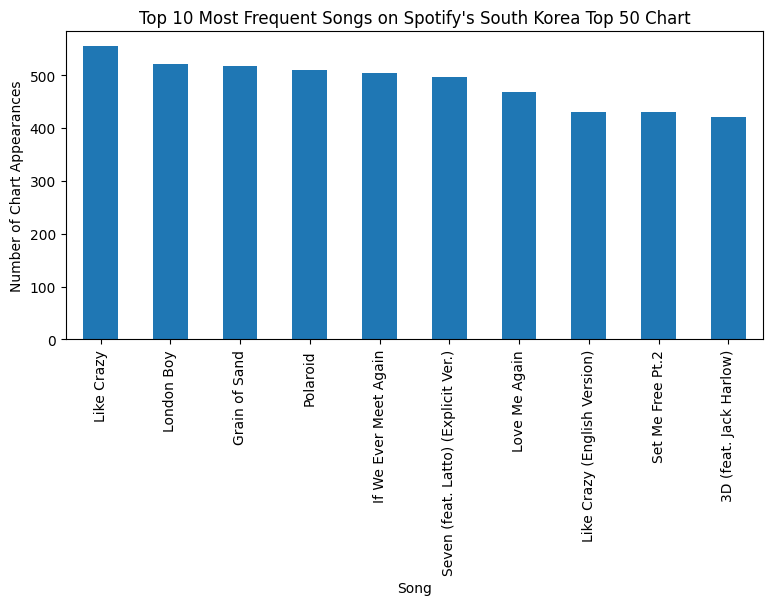

In [58]:
#In order to visualize the top songs, we make a bar graph
top_songs = data["song"].value_counts().head(10)
top_songs.plot(kind="bar", figsize=(9,4))
plt.title("Top 10 Most Frequent Songs on Spotify's South Korea Top 50 Chart")
plt.xlabel("Song")
plt.ylabel("Number of Chart Appearances")
plt.show()

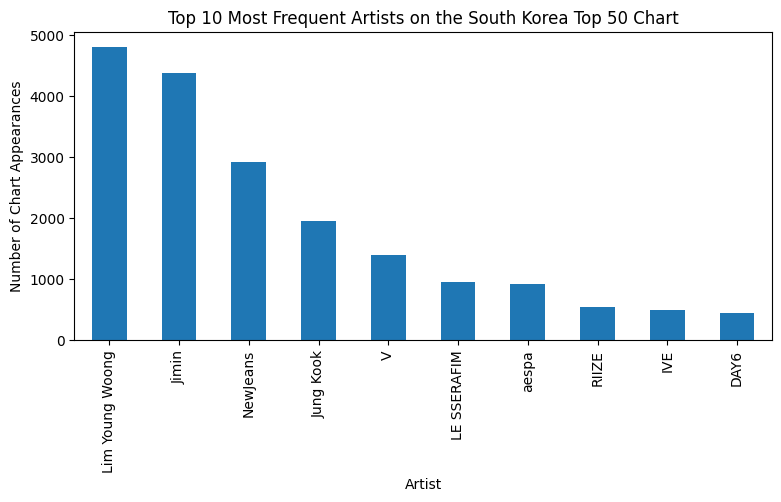

In [56]:
#Then we do the same for the artists
top_artists = data["artist"].value_counts().head(10)
top_artists.plot(kind="bar", figsize=(9,4))
plt.title("Top 10 Most Frequent Artists on Spotify's South Korea Top 50 Chart")
plt.xlabel("Artist")
plt.ylabel("Number of Chart Appearances")
plt.show()

In [62]:
#2. We want to find whether single or album tracks rank higher in top 50 charts

#We want to find the average rank of singles or songs that are in albums and compare
single_songs = data[data["album_type"] == "single"]
album_songs = data[data["album_type"] == "album"]

#Average rank of singles
average_single_rank = round(single_songs["position"].mean(), 1)

#Average rank of Album songs
average_album_rank = round(album_songs["position"].mean(), 1)

#Print the Result
print("Average Rank of Single Songs:", average_single_rank)
print("Average Rank of Album Songs:", average_album_rank )

#Concluded that Single Songs rank higher and songs in an album

Average Rank of Single Songs: 24.5
Average Rank of Album Songs: 27.3


In [71]:
#3. Finally, we want to see whether newer songs or older songs get charted higher
#Take the average of all top 10 song
avg_top_10 = round(data[data["position"] <= 10]["age_of_song"].mean(), 1)

#Take the average of all songs ranked 40 and higher
avg_top_40 = round(data[data["position"] >= 40]["age_of_song"].mean(), 1)

#Print the result
print("Average AGE (in days) of Top 10 Songs:", avg_top_10)
print("Average AGE (in days) of Songs Ranked 40 and Higher:", avg_top_40)

#We can conclude that newer songs get ranked higher than older songs#

Average AGE (in days) of Top 10 Songs: 145.4
Average AGE (in days) of Songs Ranked 40 and Higher: 380.1

We can conclude that newer songs get ranked higher than older songs
